# Predictive model with Classifiction models

Due to the conditions we live in today, the use of the internet for job search has increased in recent years. We believe that the safety of these people when applying is of great importance, so we decided to create a forecasting model to recognize fraud in a possible job offer.

For this, we decided to investigate the occurrences of fraud in job interviews collected in a database. Using different classification methods known in the literature. Thus, we will analyze their proficiency in classifying a possible fraud of a proposal in order to help unemployed people.

## How it works

In general, the process of building a predictive model consists of the following steps:

1. Data mining;
2. Data exploration;
3. Data preparation;
3. Model training;
4. Model Evaluation;
5. Model optimization.

These activities are performed iteratively, modifying parameters, organizing data, obtaining new data, testing algorithms, creating new variables, among others, until you have the ideal model to solve the business problem we are working on.


## 1. Import dependencies

Some libraries with ready-to-use functions can be used to assist in the process of building the predictive model.


In [1]:
# pandas - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
# See more at: https://pandas.pydata.org/docs/
import pandas as pd

# NumPy - The fundamental package for scientific computing.
# See more at: https://numpy.org/doc/stable/reference/index.html
import numpy as np

# scikit-learn - Simple and efficient tools for predictive data analysis
# See more at: https://scikit-learn.org/stable/modules/classes.html

# - Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# - Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# - Naive Bayes classifier for multinomial models
from sklearn.naive_bayes import MultinomialNB

# - Naive Bayes classifier for multinomial models
from sklearn.naive_bayes import GaussianNB

# - Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# - A decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# - Accuracy classification score
from sklearn.metrics import accuracy_score

# - Compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix

# - Confusion Matrix visualization
from sklearn.metrics import ConfusionMatrixDisplay

# matplotlib - A comprehensive library for creating static, animated, and interactive visualizations
# See more at: https://matplotlib.org/stable/contents.html

# - pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation
import matplotlib.pyplot as plt

# - Colormap objects based on lookup tables using linear segments
from matplotlib.colors import LinearSegmentedColormap


## 2. Preparation of the DataFrame

In [2]:
# Dataset file path
path = "../src/dataset/fake_job_postings.csv"

# Load dataset into a DataFrame and fill missing values
df = pd.read_csv(path, index_col="job_id").fillna("Missing")

# Isolate target data
target = df["fraudulent"]


### 2.1. categorigal feature dummies

Because the dataset has text information, it was necessary to adopt conversions on this data. We put a part of the textual information in a single column, to facilitate the classification of the predictive model. We also adopted, so that other types of categorical data were changed from line to column, and that if an interview presented column information, the value assigned at the intersection between them would be 1, otherwise the value would be 0. Following a Boolean logic. With that we are ready to apply the model!


In [3]:
# Get categorical dummies from column
def get_most_fraudulent_dummies(column):
    # Cross analisys between column and target
    cross = pd.crosstab(column, target)

    # Filter the 20 larger positive occurrences
    filtered = cross[1].sort_values(ascending=False).iloc[0:20]

    # Get categories
    categories = filtered.index

    # Create a new DataFrame
    dummies = pd.DataFrame(index=column.index)

    # Create a new column for each categorie
    for categorie in categories:
        # New column name
        name = f"{column.name}-{categorie}"

        # Get line dummie value
        categorie_value = column == categorie

        # Convert value from boolean to int
        categorie_dummies = categorie_value.apply(int)

        # Append new column
        dummies[name] = categorie_dummies

    return dummies

# Join categorigal feature dummies into the DataFrame
df = df.join(get_most_fraudulent_dummies(df["department"]))
df = df.join(get_most_fraudulent_dummies(df["employment_type"]))
df = df.join(get_most_fraudulent_dummies(df["required_experience"]))
df = df.join(get_most_fraudulent_dummies(df["required_education"]))
df = df.join(get_most_fraudulent_dummies(df["industry"]))
df = df.join(get_most_fraudulent_dummies(df["function"]))


### 2.2. Merge text columns


In [4]:
# Merge text columns
df["company"] = df["title"]  + " " + df["company_profile"] + " " + df["description"] + " " + df["requirements"] + " " + df["benefits"]

# Drop remaining columns not relevant to the analysis
df = df.drop(axis = "columns", columns = ["title", "location", "salary_range", "company_profile", "description", "requirements", "benefits", "fraudulent", "department", "employment_type", "required_experience", "required_education", "industry", "function"])


## 3. DataFrame Prewview

In [5]:
df.head()

,telecommuting,has_company_logo,has_questions,department-Missing,department-Engineering,department-Clerical,department-Oil & Energy,department-Information Technology,department-Administrative,department-Customer Service,...,function-Marketing,function-Human Resources,function-Management,function-Financial Analyst,function-Advertising,function-Data Analyst,function-Consulting,function-Distribution,function-Design,company
job_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"Marketing Intern We're Food52, and we've creat..."
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Customer Service - Cloud Video Production 90 S...
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Commissioning Machinery Assistant (CMA) Valor ...
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Account Executive - Washington DC Our passion ...
5,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bill Review Manager SpotSource Solutions LLC i...


## 4. Preparation of the classifier

### 4.1 Spliting Training and Testing

We should divide our data set into 2 parts, one for training and the other for testing the predictive model. There is no general rule for dividing the data, we will use 70% of the data for training and 30% of the data for testing.

To run the model, it was necessary to balance fraudulent and non-fraudulent data. In the dataset there were approximately 18,000 pieces of data and only 800 were fraudulent. In this case, our model would be biased and not accurate when analyzing a random variable.

The solution was to create a class that balances the data, so the training will have a similar database for each possibility. Afterwards, it will be executed several times, shuffling the data with this proportionality, and presenting the average of hits.


In [6]:
class Balanced_dataset:
    def __init__(self, feature, target, **kwargs):
        self.feature = feature
        self.target  = target

        # Split feature and tharget into train and test
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(feature, target, **kwargs)

    # Return n splits of feature and target
    def get_balanced_split(self, feature, target):
        # Positive and negative occurrences 
        target_true  = target.loc[target == 1]
        target_false = target.loc[target == 0]

        # Amount of occurrences
        size_true  = len(target_true)
        size_false = len(target_false)

        # Splits target into N pieces based on the highest occurrence value so that all splits have a balanced amount.
        if size_true > size_false:
            target_split = np.array_split(target_true, np.floor(size_true / size_false))
            target_base  = target_false
        else:
            target_split = np.array_split(target_false, np.floor(size_false / size_true))
            target_base  = target_true

        target_full_split = [split.append(target_base) for split in target_split]

        # Join each target of each split with its respective feature
        balanced_splits = [(feature.loc[split.index], split) for split in target_full_split]

        return balanced_splits

    # Get a list of splits of the feature and target for training with all splits with balanced values
    def get_train(self):
        return self.get_balanced_split(self.X_train, self.y_train)

    # Get a list of the feature and target for testing
    def get_test(self):
        return self.X_test, self.y_test


In [7]:
dataset = Balanced_dataset(df, target, train_size=70/100)

### 4.2. 

In [8]:
class Split_train_model:
    def __init__(self, dataset, classifier, vectorizer=None, vectorize_col=None):
        self.dataset = dataset
        self.classifier = classifier
        self.vectorizer = vectorizer
        self.vectorize_col = vectorize_col

        # Starts model training automatically
        self.train()

    def train(self):
        # Buffers a model and a vector for each training split
        self.models  = []
        self.vectors = []

        for feature, target in self.dataset.get_train():
            if self.vectorizer:
                # Reset the feature feature indexes, isolate the vectorisable feature...
                feature.reset_index(inplace=True)
                vectorize_Series = feature[self.vectorize_col]
                del feature[self.vectorize_col]

                # ... then create a vector and fit the vectorisable feature on it, ...
                vector = self.vectorizer()
                vectorize_transform = vector.fit_transform(vectorize_Series).toarray()

                # ... put it on a new Dataframeand then join into the feature
                vectorize_dataframe = pd.DataFrame(vectorize_transform)
                feature = feature.join(vectorize_dataframe)

            # create a classifier and trai it by fitting the feature and target
            model = self.classifier().fit(feature, target)

            # Buffers the model and the vector
            self.models.append(model)
            self.vectors.append(vector)

    # Get model accuracy score with test dataset
    def test(self):
        # Get the test dataset
        X, y = self.dataset.get_test()

        # Runs the model with the test dataset
        predict = self.predict(X)

        # Get prediction accuracy score
        score = accuracy_score(y, predict)

        # Get confusion matrix
        confusion = confusion_matrix(y, predict, normalize="all")

        return score, confusion

    def predict(self, feature):
        # Buffer the prediction results of each model split
        feature_predicts = []

        for i, model in enumerate(self.models):
            # Copy the feature to predict for the model split and reset index
            feature_copy = feature.copy().reset_index()

            if self.vectorizer:
                # Isolate the vectorisable feature...
                vectorize_feature = feature_copy[self.vectorize_col]
                del feature_copy[self.vectorize_col]

                # ... get the current model vector and transform the vectorisable feature with it...
                vector = self.vectors[i]
                feature_transform = vector.transform(vectorize_feature).toarray()

                # ... put it on a new Dataframe and join into the feature
                feature_dataframe = pd.DataFrame(feature_transform)
                feature_copy = feature_copy.join(feature_dataframe)

            # Runs the current model with the transformed feature
            predicts = model.predict(feature_copy)

            # Append the predicted result of each feature item into a 2D matrix (item x prediction)
            for i, predict in enumerate(predicts):
                if i >= len(feature_predicts):
                    feature_predicts.append([])

                feature_predicts[i].append(predict)

        # Get the average prediction of each feature item
        result = [np.round(sum(predict) / len(predict)) for predict in feature_predicts]

        return result


### 4.3. Extra: Custom Colormap

In [9]:
colormap = {'red':   [[ 0,       1, 1],
                      [ 1, 238/255, 1]],
            'green': [[ 0,       1, 1],
                      [ 1,  68/255, 1]],
            'blue':  [[ 0,       1, 1],
                      [ 1,  68/255, 1]]}

insper_colormap = LinearSegmentedColormap('insper', segmentdata=colormap)

## 5. Predictive model with Multinomial Naive Bayes

The first prediction model used was the multinomial Bayes, it is a distribution parameterized by vectors. Vectors are representations of an observation obtained by the probability of an event x occurring. So the vector is estimated by the formula:

## $\hat\theta_{yi}=\frac{N_{yi}+\alpha}{N_y + \alpha N}$

Where $N_{yi}$ is the number of occurrences of the analyzed characteristic appearing in the training dataset, $N_y$ is the number of unique occurrences, $N$ is the number of total occurrences, and alpha is a constant that prevents the probability from being equal to 0. If alpha has the value equal to 1, it is called Laplace, if alpha is greater than 1, it is called Lidstone.

We chose this model because it can predict our objective with some precision. Thanks to the mining carried out on the database, the model becomes effective in working with the probabilities of each column and sorting based on this information.


In [10]:
MultinomialNB_model = Split_train_model(dataset, classifier=MultinomialNB, vectorizer=lambda: CountVectorizer(stop_words="english"), vectorize_col="company")


### 5.1. Testing the model

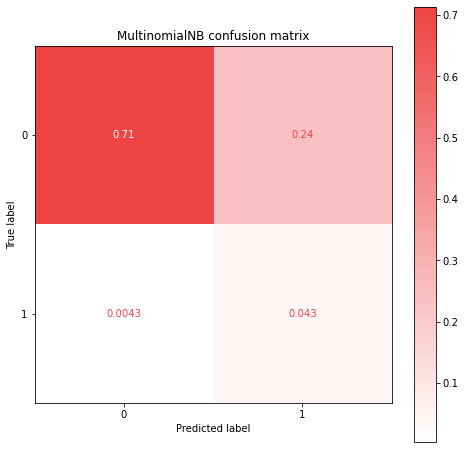

In [11]:
MultinomialNB_accuracy, MultinomialNB_confusion = MultinomialNB_model.test()

# Plot a heat map with the obtained values
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(title="MultinomialNB confusion matrix")
ConfusionMatrixDisplay(MultinomialNB_confusion).plot(ax=ax, cmap=insper_colormap)
plt.rcParams["font.size"] = "14"
plt.savefig("plots/MultinomialNB_confusion_matrix.png", dpi=300)
plt.show()


## 6. Predictive model with Gaussian Naive Bayes

The second model is the Gaussian, which follows a normal distribution pattern, for the calculation of the event to happen, this formula is used:

## $P(x_i|y) =\frac{1}{(2\sigma_y^2)^{\frac{1}{2}}}\cdot exp(\frac{-(xi -\mu y)^2}{2\sigma_y^2})$

In this formula, $x_i$ is the probability of an event $x_i$ given a database $y$, $\sigma_y$ is the standard deviation and $\mu_y$ is the average value of the variable $x_i$.

This model can be used for probabilistic analysis of a large part of events, but it presents problems when the sample space is large, and this is our case. Thanks to this, the model loses efficiency, generating an increase in the machine's error rate.



In [12]:
GaussianNB_model = Split_train_model(dataset, classifier=GaussianNB, vectorizer=lambda: CountVectorizer(stop_words="english"), vectorize_col="company")


### 6.1. Testing the model

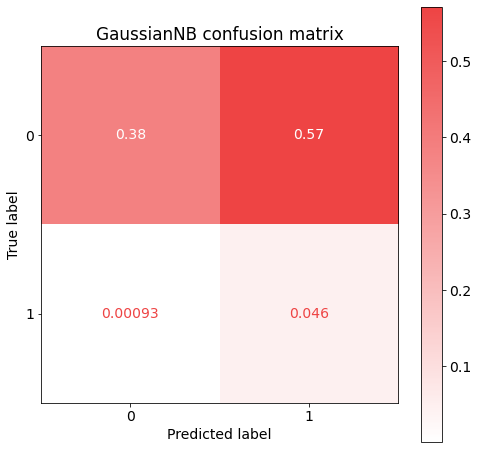

In [13]:
GaussianNB_accuracy, GaussianNB_confusion = GaussianNB_model.test()

# Plot a heat map with the obtained values
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(title="GaussianNB confusion matrix")
ConfusionMatrixDisplay(GaussianNB_confusion).plot(ax=ax, cmap=insper_colormap)
plt.rcParams["font.size"] = "14"
plt.savefig("plots/GaussianNB_confusion_matrix.png", dpi=300)
plt.show()


## 7. Predictive model with Gaussian Decision tree

The third model is the decision tree. This model classifies the random variable in a binary way. Thanks to the process mentioned in the mining part, the generation of nodes by the split function was optimized, to the point of reducing the need for computer processing and facilitating the branches for analysis.

One of the advantages is the ease of interpreting the results, as the graphical visualization is simple and intuitive. The other is that the model does not need a lot of data to carry out the classification, and also, it has high accuracy against a large database.

In [14]:
DecisionTree_model = Split_train_model(dataset, classifier=DecisionTreeClassifier, vectorizer=lambda: CountVectorizer(stop_words="english"), vectorize_col="company")


### 7.1. Testing the model

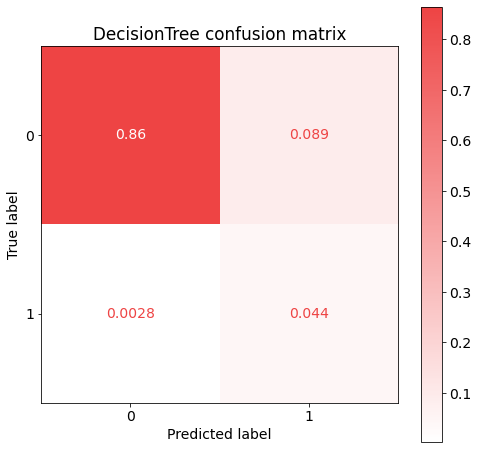

In [15]:
DecisionTree_accuracy, DecisionTree_confusion = DecisionTree_model.test()

# Plot a heat map with the obtained values
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(title="DecisionTree confusion matrix")
ConfusionMatrixDisplay(DecisionTree_confusion).plot(ax=ax, cmap=insper_colormap)
plt.rcParams["font.size"] = "14"
plt.savefig("plots/DecisionTree_confusion_matrix.png", dpi=300)
plt.show()


## 8. Genereal Overview

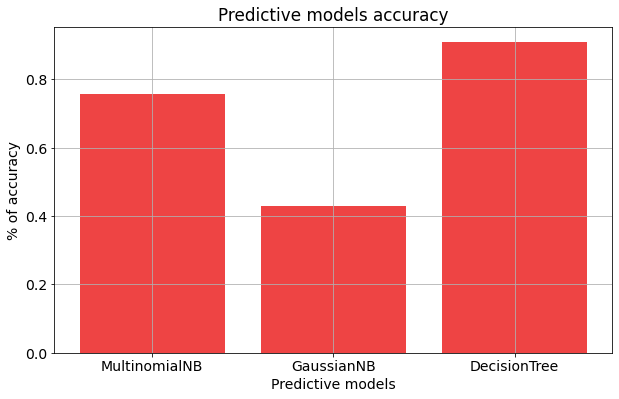

In [16]:
accuracies = [MultinomialNB_accuracy, GaussianNB_accuracy, DecisionTree_accuracy]
titles     = ["MultinomialNB", "GaussianNB", "DecisionTree"]

plt.figure(figsize=(10, 6))
plt.title("Predictive models accuracy")
plt.bar(titles, accuracies, color="#E44")
plt.xlabel("Predictive models")
plt.ylabel("% of accuracy")
plt.rcParams["font.size"] = "12"
plt.grid()
plt.savefig("plots/Predictive models accuracy.png", dpi=300)
plt.show()

## 9. Conclusion

Initially, with the analysis of the results of each model, it is possible to conclude that, through the effectiveness of hits, there is an advantage in creating a classifier from the decision tree model. However, it is important to describe the reason for this statement.

For this, we will analyze the behavior of the Gaussian model, which behaves like a normal. As mentioned in the part of prediction models, the Gaussian model is not effective when working with a large sample space. For example, it would not be effective when analyzing the number of cars passing through the toll booth per hour during a day. However, if we did the process several times and applied the normal model using the averages of cars obtained in each day, it would behave like a normal.

In the case of our classifier, for it to have an improvement in its accuracy, it would be necessary to perform the test numerous times and calculate the means of each test. After the calculations, we would apply the Gaussian model again, and thus, the behavior of the analysis of means would be normal.

For the multinomial model, the complication is related to the alpha constant. The need to use this constant influence in the analysis of the model. Depending on the database used for training and testing, the classifier ends up being biased and imprecise, as the constant avoids the probability of the random variable being 0.

The decision tree was the most effective in predicting fraudulent job openings. This is due to the dataset mining process, in which we transform the data into binary logic (0 and 1). It is intuitive to say that the computer works better when the data analysis matches its operation, however, the real reason is because it is a linear analysis with fewer variables and the result is more direct and accurate.


## 10. Bibliography

Shriram. "**Multinomial Naive Bayes Explained**: Function, Advantages & Disadvantages, Applications in 2021". upGrad, 2021, https://www.upgrad.com/blog/multinomial-naive-bayes-explained/. Accessed 08 Jun 2021.

Zibetti, André. "**Distribuição Normal (Gaussiana)**". Universidade Federal de Santa Catarina, https://www.inf.ufsc.br/~andre.zibetti/probabilidade/normal.html. Accessed 08 Jun 2021.

Tamais, Ana. "**Modelos de Predição**: Naive Bayes". Medium, 2019, https://medium.com/turing-talks/turing-talks-16-modelo-de-predi%C3%A7%C3%A3o-naive-bayes-6a3e744e7986. Accessed 08 Jun 2021.
